<a href="https://colab.research.google.com/github/harishpilla/Research/blob/Research/Moons_Dataset_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = torch.from_numpy(y).float()
y = y.view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

class DLGN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(DLGN, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        
        # Gating Network
        self.gating_network = nn.ModuleList([nn.Linear(input_dim, hidden_dim)])
        for i in range(num_layers - 1):
            self.gating_network.append(nn.Linear(hidden_dim, hidden_dim))
        
        # Weight Network
        self.weight_network = nn.ModuleList([nn.Linear(input_dim, hidden_dim)])
        for i in range(num_layers - 1):
            self.weight_network.append(nn.Linear(hidden_dim, hidden_dim))
        self.weight_network.append(nn.Linear(hidden_dim, output_dim))
        
        # Beta Parameter for gating network
        self.beta = 10.0


        
    def forward(self, x,epoch):
        curr_x = x
        self.gate_scores = []
        self.gate_values = []
        self.weight_scores = []
        self.weight_values = []

        for i in range(self.num_layers):
            # Gating Network Forward
            curr_gate_scores = self.gating_network[i](curr_x)
            self.gate_scores.append(curr_gate_scores)
            curr_gate_on_off = torch.sigmoid(self.beta * curr_gate_scores)
            self.gate_values.append(curr_gate_on_off)

            # Weight Network Forward
            if i == 0:
                curr_weight_scores = self.weight_network[i](torch.ones_like(curr_x))
            else:
                curr_weight_scores = self.weight_network[i](self.weight_values[-1])
            curr_weight_values = curr_weight_scores * curr_gate_on_off
            self.weight_scores.append(curr_weight_scores)
            self.weight_values.append(curr_weight_values)

            # Update Hidden Layer Input
            curr_x = self.gate_scores[-1]

        # Final Output
        output = self.weight_network[-1](curr_x)

        # Store gate and weight parameters' values
        for i, gate_layer in enumerate(self.gating_network):
            self.gate_params[i].append(gate_layer.weight.data.clone())
        for i, weight_layer in enumerate(self.weight_network):
            self.weight_params[i].append(weight_layer.weight.data.clone())

        return output
      
    def predict(self, x):
        with torch.no_grad():
            output = self.forward(x)
            return output


# Initialize Model
input_dim = 2
hidden_dim = 5
output_dim = 1
num_layers = 2
gate_scores_list = []
gate_values_list = []
weight_scores_list = []
weight_values_list = []
model = DLGN(input_dim, hidden_dim, output_dim, num_layers)

# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train Model
num_epochs = 200

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X_train,epoch)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()


    gate_scores_list.append(model.gate_scores)
    gate_values_list.append(model.gate_values)
    weight_scores_list.append(model.weight_scores)
    weight_values_list.append(model.weight_values)

    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")



# gate_scores_tensor = torch.stack([torch.stack(gate_scores) for gate_scores in gate_scores_list])
# gate_values_tensor = torch.stack([torch.stack(gate_values) for gate_values in gate_values_list])
# weight_scores_tensor = torch.stack([torch.stack(weight_scores) for weight_scores in weight_scores_list])
# weight_values_tensor = torch.stack([torch.stack(weight_values) for weight_values in weight_values_list])

# gate_scores_tensor = torch.stack(gate_scores_list)
# gate_values_tensor = torch.stack(gate_values_list)
# weight_scores_tensor = torch.stack(weight_scores_list)
# weight_values_tensor = torch.stack(weight_values_list)


# Evaluate Model
# with torch.no_grad():
#     y_pred = model(X_test)
#     y_pred = torch.argmax(y_pred, dim=1)
#     accuracy = torch.sum(y_pred == y_test) / len(y_test)
#     # print()
#     print(f"Accuracy: {accuracy.item()}")


Epoch: 10, Loss: 0.5893
Epoch: 20, Loss: 0.4433
Epoch: 30, Loss: 0.3402
Epoch: 40, Loss: 0.3061
Epoch: 50, Loss: 0.2704
Epoch: 60, Loss: 0.2568
Epoch: 70, Loss: 0.2534
Epoch: 80, Loss: 0.2530
Epoch: 90, Loss: 0.2530
Epoch: 100, Loss: 0.2528
Epoch: 110, Loss: 0.2527
Epoch: 120, Loss: 0.2527
Epoch: 130, Loss: 0.2527
Epoch: 140, Loss: 0.2527
Epoch: 150, Loss: 0.2527
Epoch: 160, Loss: 0.2527
Epoch: 170, Loss: 0.2527
Epoch: 180, Loss: 0.2527
Epoch: 190, Loss: 0.2527
Epoch: 200, Loss: 0.2527


In [2]:
      # for i in range(100):
      #   for j in range(100):
      #     print(xx1[i][j],xx2[i][j])

      # w1 = model.gating_network[0].weight.data.numpy()[0][0]  # fill in the code to get the value of w1
      # w2 = model.gating_network[0].weight.data.numpy()[0][1]  # fill in the code to get the value of w2
      # b1 = model.gating_network[0].bias.data.numpy()[0]



      # plt1.scatter(X[:,0], X[:,1], c=y)
      # plt1.contourf(xx1, xx2, predictions_1, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)

      # plt2.scatter(X[:,0], X[:,1], c=y)
      # plt2.contourf(xx1, xx2, predictions_1, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)




      # for i in range(len(xx1.flatten())):
      #   for j in range(len(xx2.flatten())):
      #     print(xx1.flatten()[i],xx2.flatten()[j],predictions_1[i][j],predictions_2[i][j])




      # plt.contour(xx1, xx2, predictions_1, levels=[0], colors='green')
      # plt.contour(xx1, xx2, predictions_2, levels=[0], colors='green')

      # # Get the indices where both predictions_1 and predictions_2 are zero
      # intersection_indices = np.logical_and(predictions_1.flatten()>=0, predictions_2.flatten()>=0)
      # intersection_indices = intersection_indices.reshape(xx1.shape)


      # # print(intersection_indices.value_counts())
      # # print(torch.sum(torch.eq(intersection_indices, 0)),torch.sum(torch.eq(intersection_indices, 1)))
      # # print(predictions_1.shape,predictions_1.shape,intersection_indices)

      # # Create a mask that is True only at the intersection_indices
      # mask = np.zeros_like(predictions_1)
      # mask[intersection_indices] = 1
      # # print(mask)
      # # for i in range(len(mask[0])):
      # #   for j in range(len(mask[1])):
      # #       if mask[i][j]==1:
      # #         print(xx1[i][j],xx2[i][j])

      # # Create a colormap with only two colors: white and yellow
      # cmap = colors.ListedColormap(['white', 'yellow'])

      # # Plot the mask as a filled contour
      # plt.contourf(xx1, xx2, mask, levels=np.linspace(0.5, 1.5, 2), alpha=0.5, cmap=cmap)

      # # Set the axis labels and title
      # plt.xlabel('x1')
      # plt.ylabel('x2')
      # plt.title('Active region for path {} neuron in first layer and {} neuron in second layer'.format(first_index, second_index))

      # # Display the plot
      # plt.show()



      # model.predict(curr_x)

      # prinr()
      # print(model.gating_network[0].weight.shape)
      # predictions=model.gating_network[0](curr_x)
      # predictions = torch.matmul(curr_x,torch.tensor(model.gating_network[0].weight.data.numpy().T))

      # print(predictions)
      # predictions = w1*xx1 + w2*xx2 + b1  # use ravel() to flatten xx1 and xx2
      # print(predictions.T)
      # predictions = predictions.reshape(xx1.shape)

      # w1 = model.gating_network[1].weight.data.numpy()[2][0]  # fill in the code to get the value of w1
      # w2 = model.gating_network[1].weight.data.numpy()[2][1]  # fill in the code to get the value of w2
      # w3 = model.gating_network[1].weight.data.numpy()[2][2]
      # w4 = model.gating_network[1].weight.data.numpy()[2][3]
      # w5 = model.gating_network[1].weight.data.numpy()[2][4]
      # b1 = model.gating_network[1].bias.data.numpy()[2]
      # predictions_1 = (w1)*xx1.ravel() + (w2)*xx2.ravel() + b1  # use ravel() to flatten xx1 and xx2
      # predictions_1 = predictions_1.reshape(xx1.shape)


      # plot the filled and unfilled contours
      # Create a mask for the intersection of the two contour plots


      # Color the intersection of the two contour plots



In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib import colors


def visualisation(first_index,second_index,x=None):
      plt.scatter(X[:,0], X[:,1], c=y)
      if x is not None:
        plt.scatter(x[:, 0], x[:, 1], marker='o', color='black', s=500)


      x1_min, x1_max = np.min(X[:,0]), np.max(X[:,0])
      x2_min, x2_max = np.min(X[:,1]), np.max(X[:,1])
      xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                            np.linspace(x2_min, x2_max, 100))


      curr_x=np.array([xx1.reshape(-1), xx2.reshape(-1)]).T
      curr_x = torch.tensor(curr_x)
      predictions = torch.matmul(curr_x,torch.tensor(model.gating_network[0].weight.data.numpy().T).double())+model.gating_network[0].bias.data.numpy()
      predictions_1=predictions[:,first_index]
      predictions = torch.matmul(predictions,torch.tensor(model.gating_network[1].weight.data.numpy().T).double())+model.gating_network[1].bias.data.numpy()
      predictions_2=predictions[:,second_index]
      
      predictions_1 = predictions_1.reshape(xx1.shape)
      predictions_2 = predictions_2.reshape(xx1.shape)

      # print(xx1.flatten(),xx2.flatten())
      # print(predictions_1.flatten(),predictions_2.flatten())

      mask = (predictions_1 > 0) & (predictions_2 > 0)

      # plt.contourf(xx1, xx2, predictions_1, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)
      # plt.colorbar()
      plt.contour(xx1, xx2, predictions_1, levels=[0], colors='green')
      # plt.contourf(xx1, xx2, predictions_2, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)
      # plt.colorbar()
      plt.contour(xx1, xx2, predictions_2, levels=[0], colors='green')
      

      plt.contourf(xx1, xx2, mask, levels=[0.5,1], colors=['yellow'], alpha=0.7)
      # plt.colorbar()
      plt.xlabel('x1')
      plt.ylabel('x2')
      plt.title('Active region for path {} neuron in first layer and {} neuron in second layer'.format(first_index,second_index))
      plt.show()


dic with key as path and its value
{(0, 0): 0.002284472367427143, (0, 1): 0.006494799194265896, (0, 2): 0.0015632214548034087, (0, 3): 0.0017293434359902551, (0, 4): 0.0005105209247637061, (1, 0): -0.005728864683862971, (1, 1): 0.0016006854323208101, (1, 2): 0.007391578341075615, (1, 3): -0.051159555800273114, (1, 4): -0.057315435060368805, (2, 0): 0.14723336238983226, (2, 1): 0.12080754508441306, (2, 2): 0.02577040238623221, (2, 3): 0.03108627998403617, (2, 4): 0.0011653444411990868, (3, 0): 0.04130225492466365, (3, 1): 0.03699855925664701, (3, 2): -0.0022049210841031844, (3, 3): -0.024835455925790104, (3, 4): -0.03372842051754732, (4, 0): 0.022680589181912462, (4, 1): 0.07057466526350373, (4, 2): 0.010339653727932252, (4, 3): 0.004334888091164961, (4, 4): 0.027044301551872554}

sorted dic with key as path and its value
[((2, 0), 0.14723336238983226), ((2, 1), 0.12080754508441306), ((4, 1), 0.07057466526350373), ((1, 4), 0.057315435060368805), ((1, 3), 0.051159555800273114), ((3, 0), 

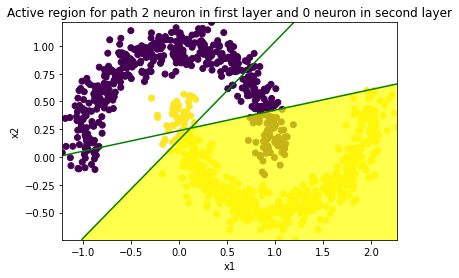

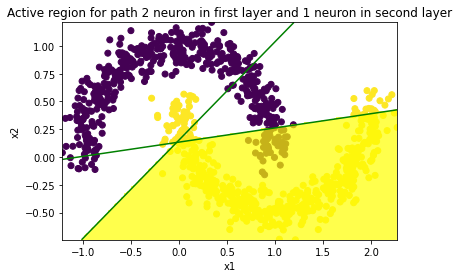

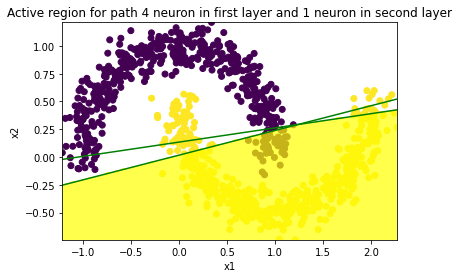

In [4]:
#take all complete paths and take absolute value and sort them
import numpy as np
from itertools import product as cartesian_prod
complete_path_vals = {}
complete_paths = list(cartesian_prod(*[range(x) for x in [5,5]]))

    
for path in complete_paths:
    temp = np.dot(model.weight_network[0].weight.data.numpy()[path[0],:], np.ones(input_dim))
    # if path[0]==2 and path[1]==3:
    #     print(temp)
    for k in range(1,2):
        temp *= model.weight_network[k].weight.data.numpy()[path[k], path[k-1]]
    temp *= model.weight_network[2].weight.data.numpy()[0, path[-1]]
    complete_path_vals[path]=temp

abs_dict = {k: abs(v) for k, v in complete_path_vals.items()}
sorted_abs_dict =sorted(abs_dict.items(), key=lambda x: x[1], reverse=True)

print("dic with key as path and its value")
print(complete_path_vals)
print()
print("sorted dic with key as path and its value")
print(sorted_abs_dict)
print()
print("Top 3 paths are")
print(sorted_abs_dict[:3])
print()
for k,v in sorted_abs_dict[:3]:
  visualisation(k[0],k[1])

Active gates for instance 141:
Layer 1: [1, 2, 3]
Layer 2: [3]

Path values:
path value 13: -0.051159555800273114
path value 23: 0.03108627998403617
path value 33: -0.024835455925790104
-0.044908731742027044

Visusalisation of those paths:


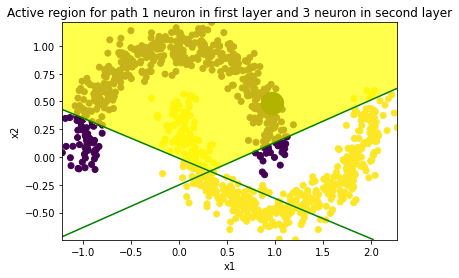

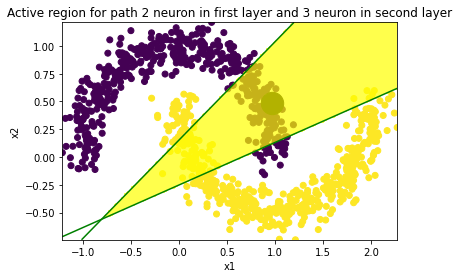

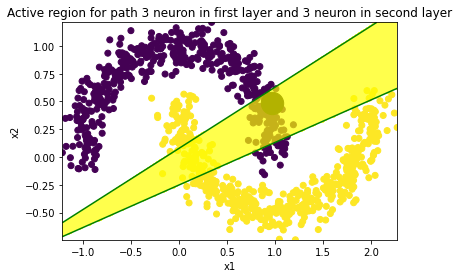

Active gates for instance 183:
Layer 1: [1, 2, 3, 4]
Layer 2: [0, 1, 4]

Path values:
path value 10: -0.005728864683862971
path value 11: 0.0016006854323208101
path value 14: -0.057315435060368805
path value 20: 0.14723336238983226
path value 21: 0.12080754508441306
path value 24: 0.0011653444411990868
path value 30: 0.04130225492466365
path value 31: 0.03699855925664701
path value 34: -0.03372842051754732
path value 40: 0.022680589181912462
path value 41: 0.07057466526350373
path value 44: 0.027044301551872554
0.37263458726458554

Visusalisation of those paths:


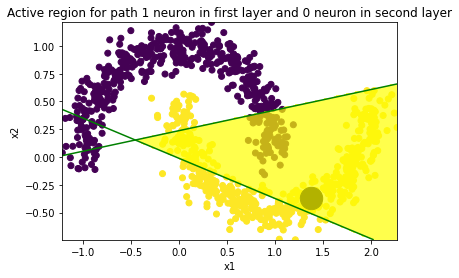

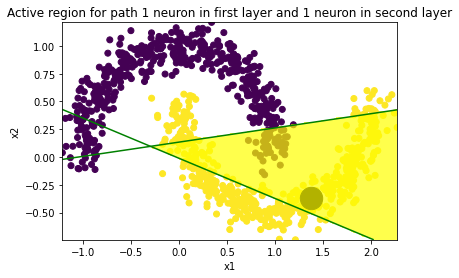

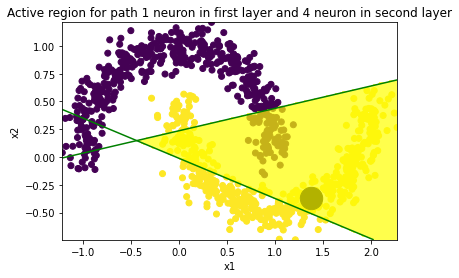

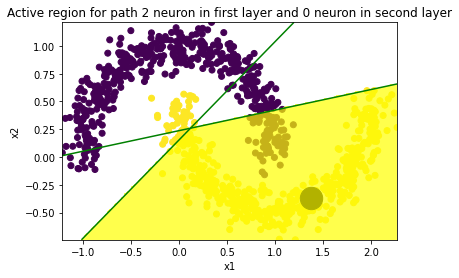

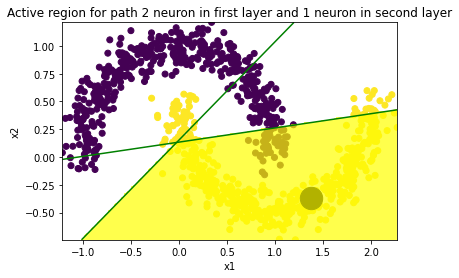

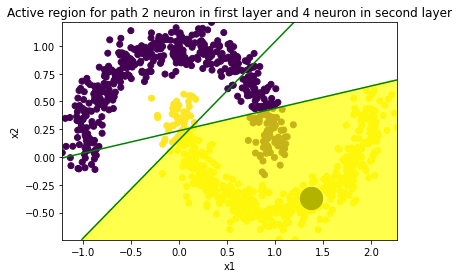

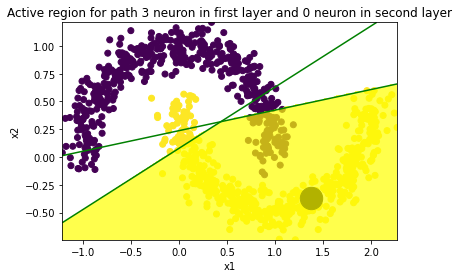

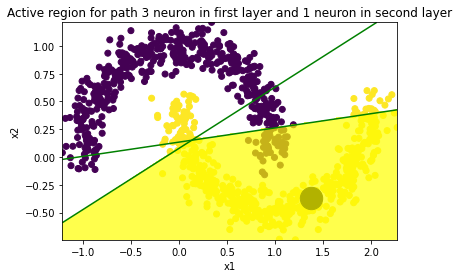

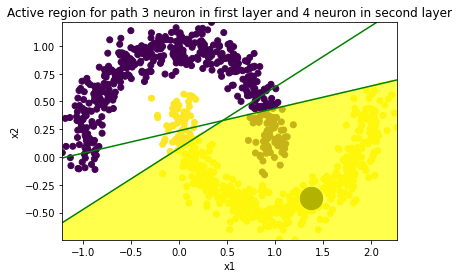

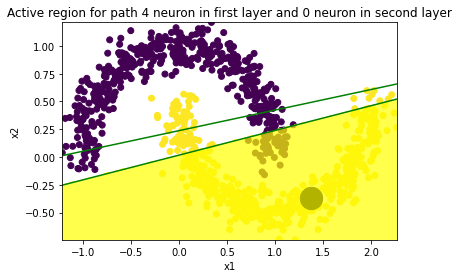

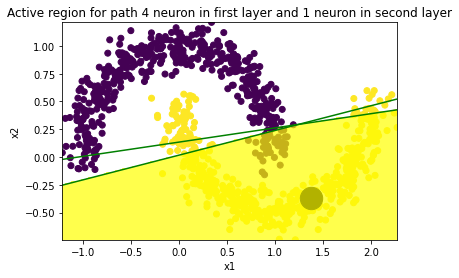

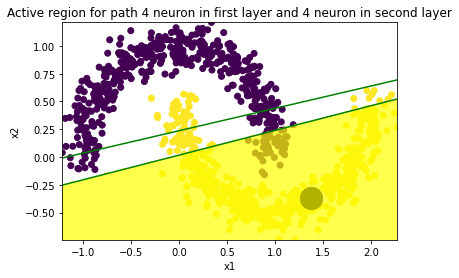

Active gates for instance 2:
Layer 1: [1, 2, 3, 4]
Layer 2: [0, 1, 4]

Path values:
path value 10: -0.005728864683862971
path value 11: 0.0016006854323208101
path value 14: -0.057315435060368805
path value 20: 0.14723336238983226
path value 21: 0.12080754508441306
path value 24: 0.0011653444411990868
path value 30: 0.04130225492466365
path value 31: 0.03699855925664701
path value 34: -0.03372842051754732
path value 40: 0.022680589181912462
path value 41: 0.07057466526350373
path value 44: 0.027044301551872554
0.37263458726458554

Visusalisation of those paths:


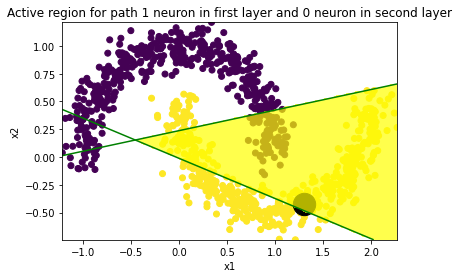

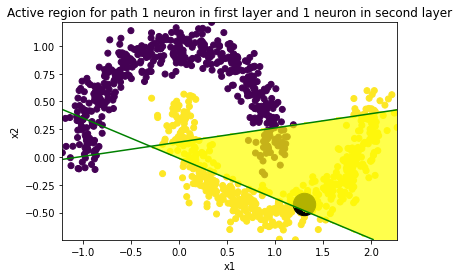

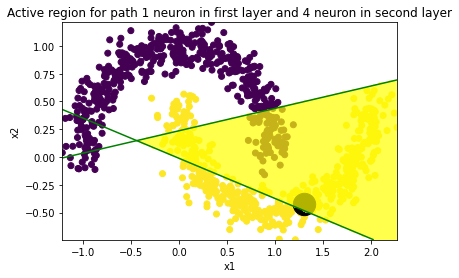

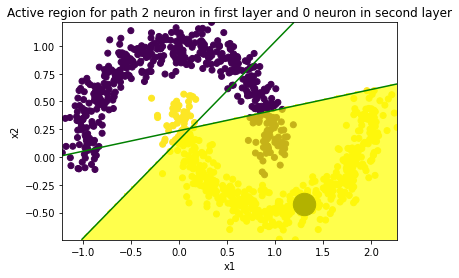

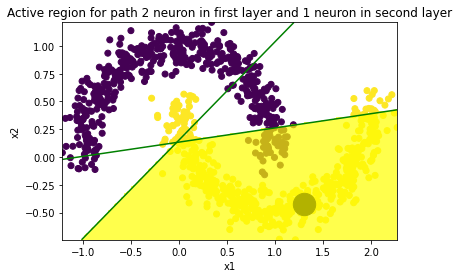

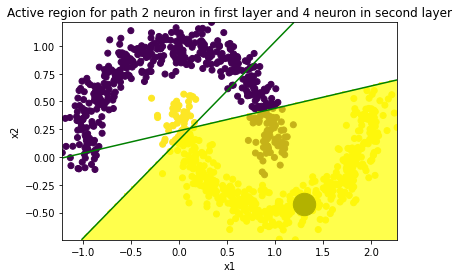

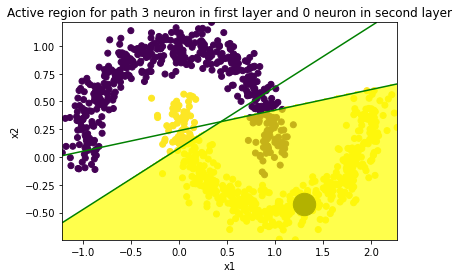

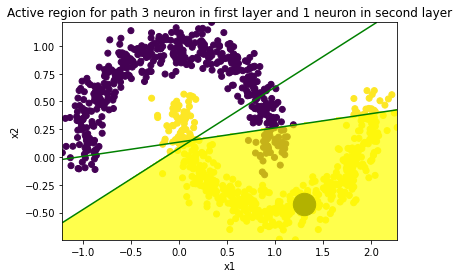

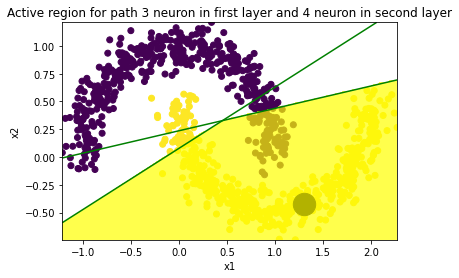

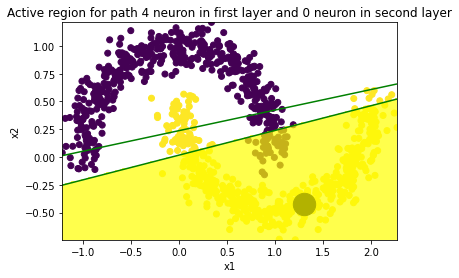

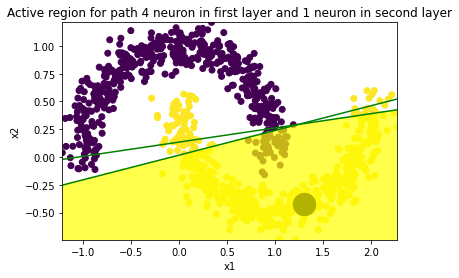

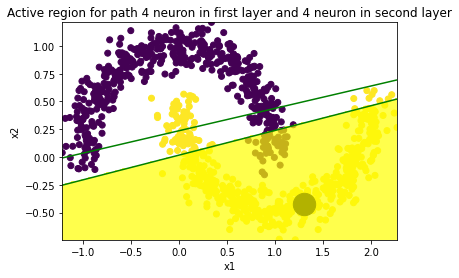

Active gates for instance 69:
Layer 1: [0]
Layer 2: [2, 3]

Path values:
path value 02: 0.0015632214548034087
path value 03: 0.0017293434359902551
0.003292564890793664

Visusalisation of those paths:


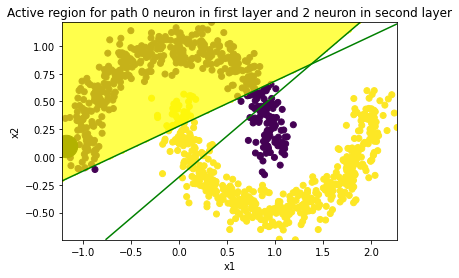

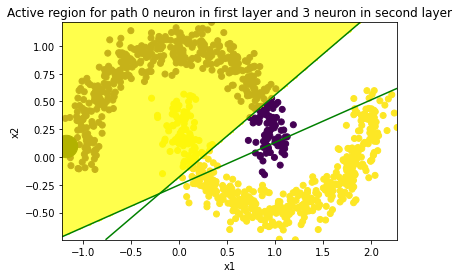

Active gates for instance 28:
Layer 1: [0, 1]
Layer 2: [2, 3]

Path values:
path value 02: 0.0015632214548034087
path value 03: 0.0017293434359902551
path value 12: 0.007391578341075615
path value 13: -0.051159555800273114
-0.04047541256840383

Visusalisation of those paths:


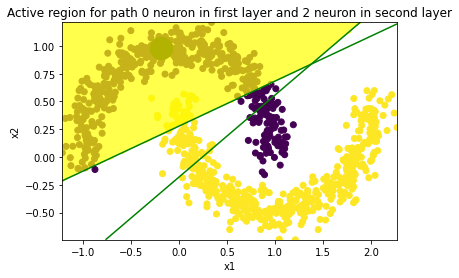

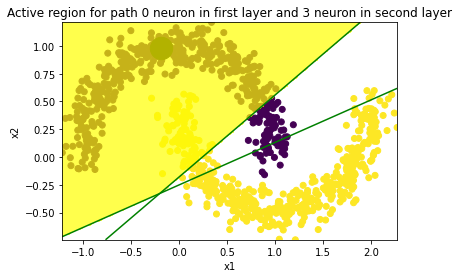

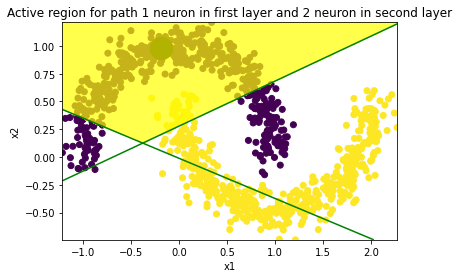

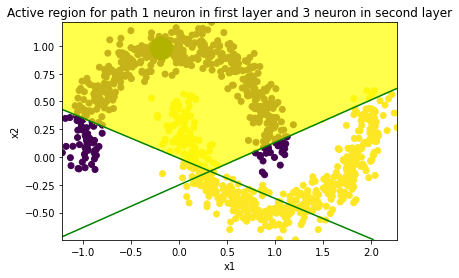

In [10]:
for i in range(5): 
  # Choose a random instance from the test set
  idx = torch.randint(len(X_test), size=(1,))
  x = X_test[idx]
  y_true = y_test[idx]

  # Forward pass to get the active gates and weights for this instance
  curr_x = x
  gate_scores = []
  gate_values = []
  weight_scores = []
  weight_values = []

  for i in range(model.num_layers):
      # Gating Network Forward
      curr_gate_scores = model.gating_network[i](curr_x)
      gate_scores.append(curr_gate_scores)
      curr_gate_on_off = torch.sigmoid(model.beta * curr_gate_scores)
      gate_values.append(curr_gate_on_off)

      # Weight Network Forward
      if i == 0:
          curr_weight_scores = model.weight_network[i](torch.ones_like(curr_x))
      else:
          curr_weight_scores = model.weight_network[i](weight_values[-1])
      curr_weight_values = curr_weight_scores * curr_gate_on_off
      weight_scores.append(curr_weight_scores)
      weight_values.append(curr_weight_values)

      # Update Hidden Layer Input
      curr_x = gate_scores[-1]

  # Get the active gates for each layer
  active_gates = []
  for i in range(model.num_layers):
      active_gates.append(torch.where(gate_values[i][0] > 0.5)[0].tolist())

  # Print the active gates and path values for the chosen instance
  print(f"Active gates for instance {idx.item()}:")
  for i in range(model.num_layers):
      print(f"Layer {i+1}: {active_gates[i]}")
  print()
  print("Path values:")
  sums=0
  for i in range(len(active_gates[0])):
    for j in range(len(active_gates[1])):
      # print(i,j,active_gates[i],active_gates[j])
      sums+=complete_path_vals[active_gates[0][i],active_gates[1][j]]
      print(f"path value {active_gates[0][i] }{active_gates[1][j]}: {complete_path_vals[active_gates[0][i],active_gates[1][j]]}")
  print(sums)
  print()
  print("Visusalisation of those paths:")
  for i in range(len(active_gates[0])):
    for j in range(len(active_gates[1])):
      visualisation(active_gates[0][i],active_gates[1][j],x)

In [ ]:
x = X_test[6]
y_true = y_test[6]

In [ ]:
print(model.weight_network[0].weight.data.numpy()[2])
print(model.weight_network[1].weight.data.numpy()[3])
print(model.weight_network[2].weight.data.numpy()[0][3])

[0.61384565 0.10158857]
[-0.43460497  0.32179692 -0.07719111  0.41957596 -0.3214132 ]
0.83350366


In [ ]:
(0.61384565+0.10158857)*-0.07719111*0.83350366

-0.04603037429584048

In [ ]:
print(X_train[0])
print(model.gating_network[0].weight.data.numpy())
print(model.gating_network[0].bias.data.numpy())
print(model.gate_scores[0].shape)
#w11*x1 + w12*x2 +b1

tensor([2.0433, 0.2758])
[[-0.07550001  1.097723  ]
 [ 0.93704766 -0.84991175]
 [-0.00777164  1.164304  ]
 [ 0.21821547  0.93307   ]
 [ 0.28654867  0.23072895]]
[-0.17369054  0.8246059   0.5199921   0.32074764 -0.7197419 ]
torch.Size([800, 5])


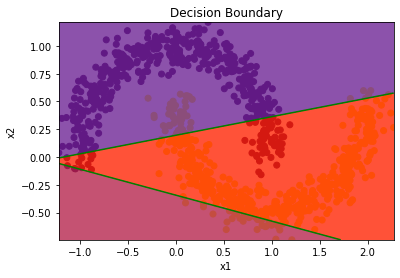

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# create a scatter plot of the data
plt.scatter(X[:,0], X[:,1], c=y)

# create a grid of points
x1_min, x1_max = np.min(X[:,0]), np.max(X[:,0])
x2_min, x2_max = np.min(X[:,1]), np.max(X[:,1])
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# w1 = model.gating_network[0].weight.data.numpy()[0][0]  # fill in the code to get the value of w1
# w2 = model.gating_network[0].weight.data.numpy()[0][1]  # fill in the code to get the value of w2
# b1 = model.gating_network[0].bias.data.numpy()[0]


curr_x=np.array([xx1.reshape(-1), xx2.reshape(-1)]).T
curr_x = torch.tensor(curr_x)
predictions = torch.matmul(curr_x,torch.tensor(model.gating_network[0].weight.data.numpy().T).double())+model.gating_network[0].bias.data.numpy()
predictions_1=predictions[:,3]
predictions = torch.matmul(predictions,torch.tensor(model.gating_network[1].weight.data.numpy().T).double())+model.gating_network[1].bias.data.numpy()
predictions_2=predictions[:,1]
predictions_1 = predictions_1.reshape(xx1.shape)
predictions_2 = predictions_2.reshape(xx1.shape)




# model.predict(curr_x)

# prinr()
# print(model.gating_network[0].weight.shape)
# predictions=model.gating_network[0](curr_x)
# predictions = torch.matmul(curr_x,torch.tensor(model.gating_network[0].weight.data.numpy().T))

# print(predictions)
# predictions = w1*xx1 + w2*xx2 + b1  # use ravel() to flatten xx1 and xx2
# print(predictions.T)
# predictions = predictions.reshape(xx1.shape)

# w1 = model.gating_network[1].weight.data.numpy()[2][0]  # fill in the code to get the value of w1
# w2 = model.gating_network[1].weight.data.numpy()[2][1]  # fill in the code to get the value of w2
# w3 = model.gating_network[1].weight.data.numpy()[2][2]
# w4 = model.gating_network[1].weight.data.numpy()[2][3]
# w5 = model.gating_network[1].weight.data.numpy()[2][4]
# b1 = model.gating_network[1].bias.data.numpy()[2]
# predictions_1 = (w1)*xx1.ravel() + (w2)*xx2.ravel() + b1  # use ravel() to flatten xx1 and xx2
# predictions_1 = predictions_1.reshape(xx1.shape)


# plot the filled and unfilled contours
# Create a mask for the intersection of the two contour plots
mask = (predictions_1 > 0) & (predictions_2 > 0)

# Plot the contour plots for both models
plt.contourf(xx1, xx2, predictions_1, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)
plt.contour(xx1, xx2, predictions_1, levels=[0], colors='green')
plt.contourf(xx1, xx2, predictions_2, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)
plt.contour(xx1, xx2, predictions_2, levels=[0], colors='green')

# Color the intersection of the two contour plots
plt.contourf(xx1, xx2, mask, levels=[0, 1], colors=['yellow'], alpha=0.1)

# Show the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()


In [ ]:
-2.0433*0.02448782 - 0.2758*1.3525525 -0.10103311 

-0.5241030521060001

In [ ]:
print(predictions[0][0])
print()

0.9375835926182372


In [ ]:
print(model.gate_values)

[tensor([[1.0000e+00, 9.9807e-01, 1.6999e-07, 4.3450e-02, 3.2584e-07],
        [2.0208e-03, 7.4822e-01, 4.9587e-01, 1.0000e+00, 1.0000e+00],
        [6.0378e-01, 2.4102e-02, 2.6667e-03, 1.0000e+00, 4.4439e-01],
        ...,
        [1.4218e-02, 4.5969e-01, 1.5475e-01, 1.0000e+00, 9.9991e-01],
        [1.0000e+00, 9.9806e-01, 3.0971e-05, 9.0840e-01, 7.2087e-03],
        [1.0000e+00, 9.9937e-01, 3.9027e-07, 4.4640e-02, 2.5035e-06]],
       grad_fn=<SigmoidBackward0>), tensor([[9.9604e-01, 7.3103e-03, 1.0000e+00, 3.8546e-03, 9.9730e-01],
        [1.2532e-04, 9.9815e-01, 1.0000e+00, 1.0540e-03, 8.8785e-03],
        [1.2979e-04, 9.9975e-01, 9.9969e-01, 3.3667e-03, 8.5580e-04],
        ...,
        [1.2337e-03, 9.9836e-01, 1.0000e+00, 1.1739e-03, 3.7988e-03],
        [4.7971e-02, 9.3949e-01, 1.0000e+00, 1.5580e-03, 3.8327e-02],
        [9.9603e-01, 7.3354e-03, 1.0000e+00, 3.8431e-03, 9.9728e-01]],
       grad_fn=<SigmoidBackward0>)]


In [ ]:
print(model.weight_values)

[tensor([[-1.8490e-02, -9.5743e-18,  3.1038e-01,  1.3973e+00,  1.8070e-04],
        [-2.2926e-07, -7.0644e-01,  8.6231e-09,  1.3966e+00,  6.2912e-03],
        [-1.2106e-02, -6.4730e-01,  4.5097e-08,  1.3973e+00,  8.3595e-03],
        ...,
        [-6.5868e-06, -7.0641e-01,  1.5325e-08,  1.3972e+00,  6.6390e-03],
        [-1.8359e-02, -3.9345e-11,  3.9182e-02,  1.3973e+00,  3.9107e-04],
        [-1.8490e-02, -2.4949e-17,  3.1211e-01,  1.3973e+00,  1.5549e-04]],
       grad_fn=<MulBackward0>), tensor([[-7.0094e-05,  5.1299e-04,  1.0226e+00, -6.2900e-01, -5.9887e-03],
        [-4.6377e-01,  2.1044e-03,  1.0175e+00, -6.6836e-03, -1.2190e-01],
        [-4.6531e-01,  2.0115e-06,  1.0086e+00, -7.0424e-05, -1.2521e-01],
        ...,
        [-4.6377e-01,  2.0949e-03,  1.0176e+00, -6.6644e-03, -1.2191e-01],
        [-3.3102e-01,  1.7615e-03,  9.9908e-01, -2.9864e-02, -1.1696e-01],
        [-6.5900e-05,  5.0933e-04,  1.0227e+00, -6.3015e-01, -5.7850e-03]],
       grad_fn=<MulBackward0>)]


In [ ]:
print(model.weight_scores)

[tensor([[-0.0185, -0.7064,  0.3207,  1.3973,  1.5419],
        [-0.0185, -0.7064,  0.3207,  1.3973,  1.5419],
        [-0.0185, -0.7064,  0.3207,  1.3973,  1.5419],
        ...,
        [-0.0185, -0.7064,  0.3207,  1.3973,  1.5419],
        [-0.0185, -0.7064,  0.3207,  1.3973,  1.5419],
        [-0.0185, -0.7064,  0.3207,  1.3973,  1.5419]],
       grad_fn=<AddmmBackward0>), tensor([[-0.4714,  0.7880,  1.0251, -0.6606, -0.1253],
        [-0.4714,  0.7880,  1.0251, -0.6606, -0.1253],
        [-0.4714,  0.7880,  1.0251, -0.6606, -0.1253],
        ...,
        [-0.4714,  0.7880,  1.0251, -0.6606, -0.1253],
        [-0.4714,  0.7880,  1.0251, -0.6606, -0.1253],
        [-0.4714,  0.7880,  1.0251, -0.6606, -0.1253]],
       grad_fn=<AddmmBackward0>)]


In [ ]:
import numpy as np
from itertools import product as cartesian_prod
complete_path_vals = np.zeros(tuple([5,5]))
complete_paths = list(cartesian_prod(*[range(x) for x in [5,5]]))

    
for path in complete_paths:
    temp = np.dot(model.weight_network[0].weight.data.numpy()[path[0],:], np.ones(input_dim))
    for k in range(1,2):
        temp *= model.weight_network[k].weight.data.numpy()[path[k], path[k-1]]
    temp *= model.weight_network[2].weight.data.numpy()[0, path[-1]]
    complete_path_vals[path]=temp

In [ ]:
print(complete_path_vals)
print(complete_paths)

[[-0.04420036 -0.06827104  0.06932434  0.04193331  0.10119365]
 [-0.23461406 -0.17478114 -0.02910674 -0.10910541 -0.01405105]
 [-0.01265468  0.00834678 -0.01111595 -0.0073588  -0.00994788]
 [-0.00850782  0.00157014 -0.0062608  -0.00420413  0.00857836]
 [ 0.00595689  0.02728908  0.05176588  0.00465362  0.01474469]]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [ ]:
print(model.weight_network[0].weight.data)
print(model.weight_network[1].weight.data)
print(model.weight_network[2].weight.data)

tensor([[ 0.0805,  0.5861],
        [-0.5398, -0.5370],
        [-0.4695,  0.4161],
        [ 0.4091, -0.3634],
        [ 0.0557, -0.3293]])
tensor([[ 0.1033, -0.3393, -0.3690,  0.2904,  0.0339],
        [-0.1343,  0.2128, -0.2049,  0.0451, -0.1308],
        [ 0.2184,  0.0568,  0.4372, -0.2882, -0.3973],
        [-0.1509, -0.2431, -0.3306,  0.2211,  0.0408],
        [ 0.3131,  0.0269,  0.3842,  0.3878, -0.1111]])
tensor([[-0.6421,  0.7626,  0.4761, -0.4168,  0.4848]])


In [ ]:
# Choose a random instance from the test set
idx = torch.randint(len(X_test), size=(1,))
x = X_test[idx]
y_true = y_test[idx]

# Forward pass to get the active gates and weights for this instance
curr_x = x
gate_scores = []
gate_values = []
weight_scores = []
weight_values = []

for i in range(model.num_layers):
    # Gating Network Forward
    curr_gate_scores = model.gating_network[i](curr_x)
    gate_scores.append(curr_gate_scores)
    curr_gate_on_off = torch.sigmoid(model.beta * curr_gate_scores)
    gate_values.append(curr_gate_on_off)

    # Weight Network Forward
    if i == 0:
        curr_weight_scores = model.weight_network[i](torch.ones_like(curr_x))
    else:
        curr_weight_scores = model.weight_network[i](weight_values[-1])
    curr_weight_values = curr_weight_scores * curr_gate_on_off
    weight_scores.append(curr_weight_scores)
    weight_values.append(curr_weight_values)

    # Update Hidden Layer Input
    curr_x = gate_scores[-1]

# Get the active gates for each layer
active_gates = []
for i in range(model.num_layers):
    active_gates.append(torch.where(gate_values[i][0] > 0.5)[0].tolist())

# Print the active gates and path values for the chosen instance
print(f"Active gates for instance {idx.item()}:")
for i in range(model.num_layers):
    print(f"Layer {i+1}: {active_gates[i]}")
print()
print("Path values:")
for i in range(len(active_gates[0])):
  for j in range(len(active_gates[1])):
    # print(i,j,active_gates[i],active_gates[j])
    print(f"path value {active_gates[0][i] }{active_gates[1][j]}: {complete_path_vals[active_gates[0][i]][active_gates[1][j]]}")


Active gates for instance 95:
Layer 1: [0]
Layer 2: [0, 3]

Path values:
path value 00: -0.0442003581762871
path value 03: 0.04193330616500578
